<a href="https://colab.research.google.com/github/mavlyut-crimea/DM_1_1-labs/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%BF%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Header

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as so


lr = 0.1
epoch = 200
eps = 0.01
t = np.linspace(0, 10, 1000)
s = np.linspace(0, 4, 1000)
X, Y = np.meshgrid(t, s)


def gradient_descent_base(f, start_pos, search_algo, max_count, draw=False):
    x, i = start_pos, 0
    points = np.zeros((max_count, len(start_pos)))
    points[i] = x
    for i in range(1, max_count):
        p = search_algo(f, x)
        if np.linalg.norm(x - p, 2) < eps:
            points.resize([i, 2], refcheck=False)
            break
        x = p
        points[i] = x
    if draw:
        plt.plot(points[:, 0], points[:, 1], 'o-')
        plt.contour(X, Y, f([X, Y]), levels=sorted([f([p[0], p[1]]) for p in points]))
        plt.show()
    return [x, i + 1]


# Задание 1. Градиентный спуск с постоянным шагом

In [3]:

def gradient_simple(f, pos):
    arr = np.array([0] * len(pos), float)
    start = f(pos)
    for i in range(len(pos)):
        pos[i] += eps
        arr[i] = (f(pos) - start) / eps
        pos[i] -= eps
    return arr


def gradient_advanced(f, pos):
    arr = np.array([0] * len(pos), float)
    for i in range(len(pos)):
        pos[i] += eps
        arr[i] = f(pos)
        pos[i] -= 2 * eps
        arr[i] = (arr[i] - f(pos)) / (2 * eps)
        pos[i] += eps
    return arr

    
def gradient_descent(f, start_pos, max_count=epoch, draw=True):
    return gradient_descent_base(
        f, start_pos, 
        lambda g, x : x - lr * np.array(gradient_simple(g, x)),
        max_count, draw)


# Задание 2. Метод одномерного поиска (метод дихотомии) и градиентный спуск на его основе

In [4]:

def dichotomy(f, pos, dir):
    r = lr
    mn = f(pos)
    while True:
        tmp = f(pos + dir * r)
        if tmp >= mn:
            break
        mn = tmp
        r *= 2
    l = 0
    for _ in range(20):
        m = (r + l) / 2
        if f(pos + (m + eps) * dir) > f(pos + (m - eps) * dir):
            r = m
        else:
            l = m
    return pos + l * dir

    
def gradient_descent_advanced(f, start_pos, max_count=epoch, draw=True):
    return gradient_descent_base(
        f, start_pos, 
        lambda g, x : dichotomy(g, x, -gradient_advanced(g, x)),
        max_count, draw)


# Задание 3-4. Примеры работы для квадратичных функций

## Пример 1

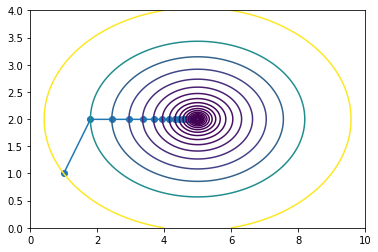

[array([4.94894079, 1.995     ]), 21]


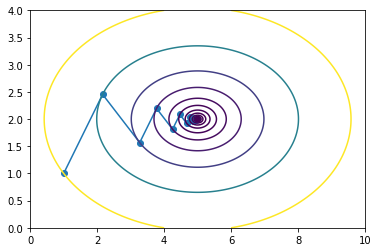

[array([4.98148738, 2.002962  ]), 14]


In [5]:

def f1(x):
    return (x[0] - 5) ** 2 + 5 * (x[1] - 2) ** 2


print(gradient_descent(f1, np.array([1, 1], float)))
print(gradient_descent_advanced(f1, np.array([1, 1], float)))


## Пример 2

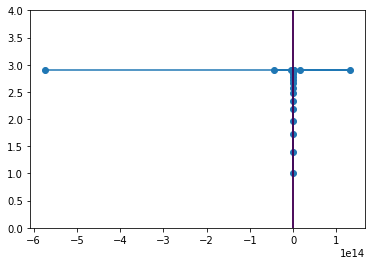

[array([-5.72707232e+14,  2.89676310e+00]), 31]


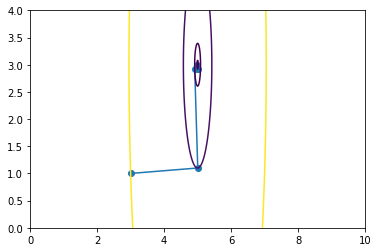

[array([4.99631819, 2.99632412]), 5]


In [ ]:

def f2(x):
    return 20 * (x[0] - 5) ** 2 + (x[1] - 3) ** 2


print(gradient_descent(f2, np.array([3., 1.], float)))
# print(gradient_descent(f2, np.array([6, 2.], float)))
print(gradient_descent_advanced(f2, np.array([3., 1.], float)))


## Пример 3

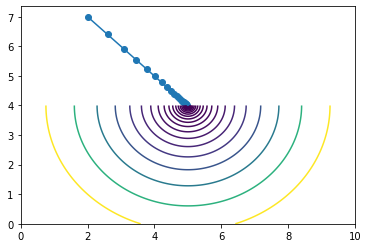

[array([4.96047   , 4.02964529]), 21]


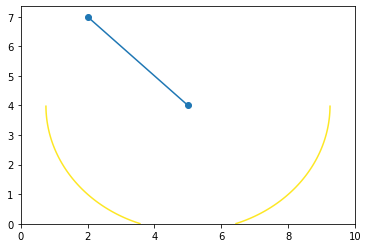

[array([5., 4.]), 2]


In [ ]:

def f3(x):
    return (x[0] - 5) ** 2 + (x[1] - 4) ** 2


print(gradient_descent(f3, np.array([2, 7], float)))
print(gradient_descent_advanced(f3, np.array([2, 7], float)))


# Задание 5. Генератор функций

Генерирует случайную квадратичную функцию `n` переменных с числом обусловленности `k`.

In [6]:

def mul(x, a): # x^T * A * x - b^T * x; x, b in R^n, A in M(n,n)
    tmp = [0] * len(x)
    for i in range(len(x)):
        for j in range(len(x)):
            tmp[i] += x[j] * a[j][i]
    ans = 0
    for i in range(len(x)):
        ans += tmp[i] * x[i]
    return ans


def generate_function(n: int, k: float):
    values = [random.uniform(1.0, k) for _ in range(n - 2)]
    values.extend([1.0, k])
    values.sort()
    d = np.diag(values)
    m = np.random.rand(n, n)
    q, _ = np.linalg.qr(m)
    matrix = np.matmul(np.matmul(q, d), np.transpose(q))
    return lambda x : mul(x, matrix)


# Задание 6. Исследование зависимости числа итераций T(n, k)

In [ ]:

test_count = 10

def T(n: int, k: float):
    sum = 0
    for _ in range(test_count):
        sum += gradient_descent_advanced(
            generate_function(n, k), 
            [10] * n,
            max_count=2000, draw=False)[1]
    print(n, k, sum / test_count)
    return sum / test_count

ax_k = np.arange(1, 1001, 100)

for n in [5, 10, 50, 100, 500, 1000]:
    plt.plot(ax_k, [T(n, k) for k in ax_k], '-o', label='n='+str(n))

plt.legend()
plt.show()


5 1 2.0
5 101 187.9
5 201 309.6
5 301 419.5
5 401 457.5
5 501 540.2
5 601 601.8
5 701 661.1
5 801 650.4
5 901 735.4
10 1 2.0
10 101 213.9
10 201 359.6
10 301 469.3
10 401 544.8
10 501 656.6
10 601 743.0
10 701 812.6
10 801 884.7


# Дополнительное задание

Возвращает точку, удовлетворяющую условиям Вольфе

In [ ]:
def get_value(f, x, direction):
    return gradient_simple(f, x) & np.transpose(direction)


def wolfe_condition(f, pos, direction, interval_length):
    direction *= interval_length
    grad = lambda p: gradient_simple(f, p)
    wolfe = so.line_search(f, grad, pos, direction)
    if wolfe[0] is not None:
        return pos + wolfe[0] * direction
    alpha = 1.0
    c1 = 0.00001
    while f(pos + alpha * direction) > f(pos) + c1 * alpha * np.matmul(grad(pos), direction):
        alpha /= 2
    return pos + alpha * direction


def wolfe_linear_search(f, pos, p):
    r = lr
    mn = f(pos)
    while True:
        tmp = f(pos + p * r)
        if tmp >= mn:
            break
        mn = tmp
        r *= 2
    return wolfe_condition(f, pos, p, r)


def wolfe_gradient_descent(f, pos):
    return gradient_descent_base(f, pos, lambda g, x: wolfe_linear_search(g, x, -gradient_simple(g, x)))

print(wolfe_gradient_descent(f1, np.array([4, 2], float)))

TypeError: ignored